In [1]:
import kagglehub
loki4514_rice_leaf_diseases_detection_path = kagglehub.dataset_download('loki4514/rice-leaf-diseases-detection')

Found 15023 files belonging to 10 classes.
Found 3422 files belonging to 10 classes.
Train classes: ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot', 'neck_blast', 'rice_hispa', 'sheath_blight', 'tungro']
Test classes: ['Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'Tungro', 'bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot']
Label mapping: [6 7 8 9 0 1 2 3 4 5]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 237s 198ms/step - accuracy: 0.3470 - loss: 1.8330 - val_accuracy: 0.7624 - val_loss: 0.7084
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.6828 - loss: 0.8980 - val_accuracy: 0.8255 - val_loss: 0.4701
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7554 - loss: 0.6844 - val_accuracy: 0.8600 - val_loss: 0.3920
Epoch 4/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8013 - loss: 0.5424 - val_accuracy: 0.8676 - val_loss: 0.3701
Epoch 5/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8274 - loss: 0.4817 - val_accuracy: 0.8852 - val_loss: 0.3250
Epoch 6/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8503 - loss: 0.4002 - val_accuracy: 0.9047 - val_loss: 0.2680
Epoch 7/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8742 - loss: 0.3352 - val_accuracy: 0.8755 - val_loss: 0.3657
Epoch 8/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8835 - loss: 0.3225 - val

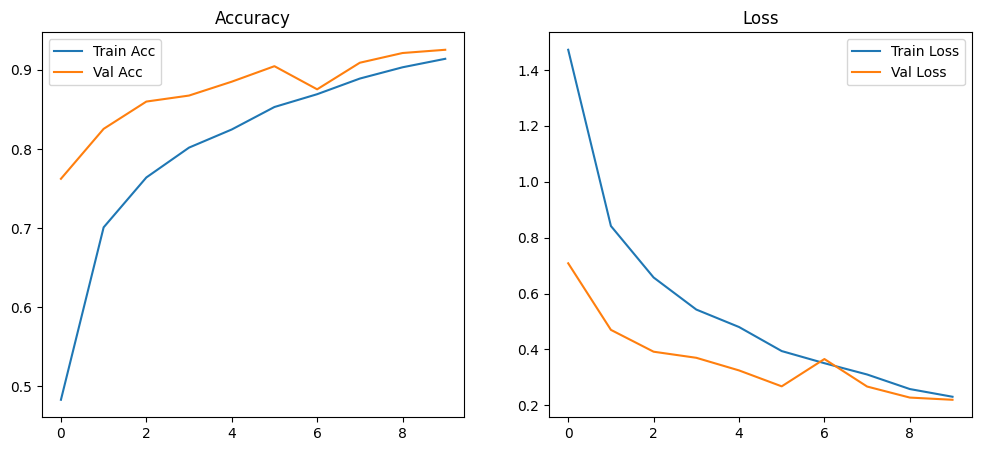

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9271 - loss: 0.2332
Test Accuracy: 0.9255


In [19]:
# ===============================
# Rice Leaf Disease Classification
# Full Pipeline with Label Mapping Fix
# ===============================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ---------------------------
# 1. Paths
# ---------------------------
train_path = "/kaggle/input/rice-leaf-diseases-detection/Rice_Leaf_Diease/Rice_Leaf_Diease/train"
test_path  = "/kaggle/input/rice-leaf-diseases-detection/Rice_Leaf_Diease/Rice_Leaf_Diease/test"

img_height, img_width = 128, 128
batch_size = 32

# ---------------------------
# 2. Load datasets
# ---------------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_class_names = train_ds.class_names
val_class_names = val_ds_raw.class_names

print("Train classes:", train_class_names)
print("Test classes:", val_class_names)

# ---------------------------
# 3. Fix label mismatch (mapping test labels to train labels)
# ---------------------------
name_map = {
    "Neck_Blast": "neck_blast",
    "Rice Hispa": "rice_hispa",
    "Sheath Blight": "sheath_blight",
    "Tungro": "tungro"
}

# Build index map
mapping = []
for name in val_class_names:
    mapped_name = name_map.get(name, name)  # if not in map, keep same
    mapping.append(train_class_names.index(mapped_name))

mapping = tf.constant(mapping)
print("Label mapping:", mapping.numpy())

# Apply mapping
def map_labels(images, labels):
    new_labels = tf.gather(mapping, labels)
    return images, new_labels

val_ds = val_ds_raw.map(map_labels)

# ---------------------------
# 4. Prefetch for performance
# ---------------------------
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ---------------------------
# 5. Build CNN Model
# ---------------------------
num_classes = len(train_class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---------------------------
# 6. Train Model
# ---------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# ---------------------------
# 7. Plot Training Curves
# ---------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Acc")
plt.plot(epochs_range, val_acc, label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

# ---------------------------
# 8. Evaluate on Test Set
# ---------------------------
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")


In [20]:
# ---------------------------
# Find Train Accuracy & Test Accuracy
# ---------------------------

# 1. Train accuracy (last epoch)
train_acc = history.history['accuracy'][-1]
print(f"Final Train Accuracy: {train_acc:.4f}")

# 2. Validation accuracy (last epoch)
val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_acc:.4f}")

# 3. Test accuracy (evaluate on test set)
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")


Final Train Accuracy: 0.9141
Final Validation Accuracy: 0.9255
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9271 - loss: 0.2332
Test Accuracy: 0.9255


✅ Final Train Accuracy: 0.9141
✅ Final Validation Accuracy: 0.9255
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9271 - loss: 0.2332
✅ Test Accuracy: 0.9255
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/st

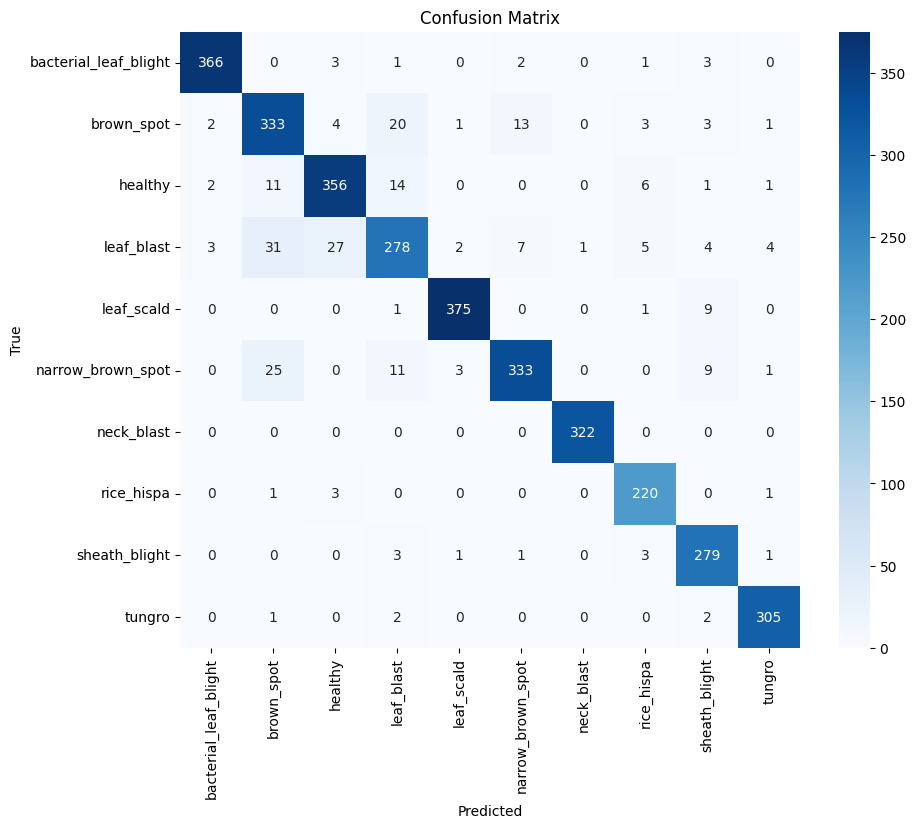

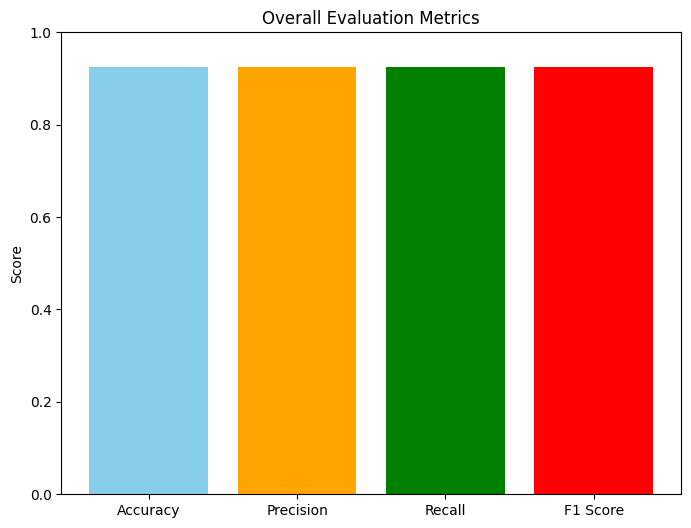

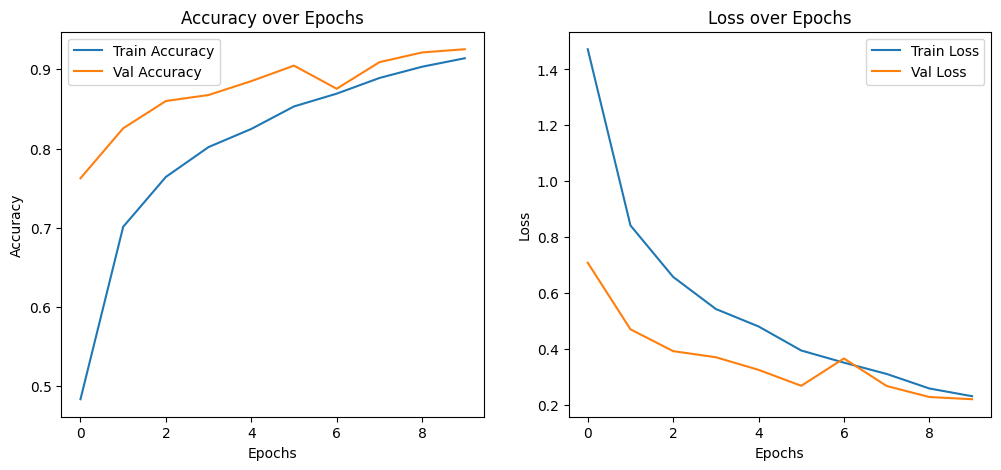

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1. Train & Validation Accuracy
# ---------------------------
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"✅ Final Train Accuracy: {train_acc:.4f}")
print(f"✅ Final Validation Accuracy: {val_acc:.4f}")

# ---------------------------
# 2. Evaluate on Test Data
# ---------------------------
test_loss, test_acc = model.evaluate(val_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# ---------------------------
# 3. Predictions for Metrics
# ---------------------------
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ---------------------------
# 4. Classification Report
# ---------------------------
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=train_class_names))

# ---------------------------
# 5. Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_class_names,
            yticklabels=train_class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# 6. Overall Metrics (Precision, Recall, F1)
# ---------------------------
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

metrics = {
    "Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=["skyblue", "orange", "green", "red"])
plt.title("Overall Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

# ---------------------------
# 7. Training Curves
# ---------------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

plt.show()
